# <font color='RoyalBlue'> **GNR-652 Project: Classifying Spam & Pishing URLs Using various ML methods**
---
## <font color='FireBrick'> **Team members:**
* **Ritij Saini** 17D070027
* **Karan Chate** 17D070023
* **Himanshu Singh** 170110076

## <font color='FireBrick'> **Problem Statement:** 
To use machine learning to classify Spam/Pishing URLs using various ML methods. This would not only save precious crawl resources by allowing the crawler to bypass spam urls, but it would also remove the possibility of that spam url from later being served to user queries, thereby improving the quality of search results.

## <font color='FireBrick'> **Introduction:**

* Spam (harmful) websites are great
problem nowadays, getting in
consider the frequency of internet activities. 
* "Spam technology" is advancing and has
opportunities to keep your site high
ranks in search results
* The motive for detection by URL is
reducing visiting opportunities
pages if based on a URL
can predict that it is harmful

## <font color='FireBrick'> **Types of Spams included in this project:**
* <font color='Red'> ***Phishing***</font> - identity theft
(personal data), most often via 
special email or chat. These days many IITB Profs are encountering this type of threats
* <font color='Red'>***Malware***</font> - software
which is intended to cause damage to
computer and computer networks
* <font color='Red'>***Defacement***</font> - change the look (content)
existing web pages


>**Spam in the narrow sense** - sending spam mass messages without any criteria

## <font color='FireBrick'> **Brief description of the process:**
* Processing URLs for retrieval
significant information
* Text data processing
via specialized algorithms -
CountVectorizer, Multinomial Naive
Bayes
* Classification using algorithms
LinearSVM, SVM with RBF kernel,
RandomForest 

## <font color='FireBrick'> **Data:** </font>
* The data set consists of about 89,000 URLs,
of which good (not harmful) make up about 40%
* The dataset is obtained from the [Canadian site
Institute for Cybersecurity](https://www.unb.ca/cic/datasets/url-2016.html)
* <font color='RoyalBlue'>**Benign URLs:**</font>   Over 35,300 benign URLs were collected from Alexa top websites. The domains have been passed through a Heritrix web crawler to extract the URLs. 
*  <font color='RoyalBlue'>**Spam URLs:** </font> : Around 12,000 spam URLs were collected from the publicly available WEBSPAM-UK2007 dataset.
*  <font color='RoyalBlue'>**Phishing URLs:** </font> Around 10,000 phishing URLs were taken from OpenPhish which is a repository of active phishing sites.
*  <font color='RoyalBlue'>**Malware URLs:** </font> More than 11,500 URLs related to malware websites were obtained from DNS-BH which is a project that maintain list of malware sites.
*  <font color='RoyalBlue'>**Defacement URLs:** </font> More than 45,450 URLs belong to Defacement URL category. They are Alexa ranked trusted websites hosting fraudulent or hidden URL that contains both malicious web pages.



Run this cell to download the dataset

In [0]:
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zklUuH8n8uRk4epgelDZYvCKOhtZak9v' -O dataset.zip
!unzip dataset.zip

Archive:  dataset.zip
  inflating: Benign_list_big_final.csv  
  inflating: __MACOSX/._Benign_list_big_final.csv  
  inflating: DefacementSitesURLFiltered.csv  
  inflating: __MACOSX/._DefacementSitesURLFiltered.csv  
  inflating: Malware_dataset.csv     
  inflating: __MACOSX/._Malware_dataset.csv  
  inflating: phishing_dataset.csv    
  inflating: __MACOSX/._phishing_dataset.csv  
  inflating: rf_model.txt            
  inflating: __MACOSX/._rf_model.txt  
  inflating: spam_dataset.csv        
  inflating: __MACOSX/._spam_dataset.csv  
  inflating: svm_model.txt           
  inflating: __MACOSX/._svm_model.txt  


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model, model_selection, metrics, svm
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import files
import pickle
np.set_printoptions(3,suppress=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Non Spam Data Set
---


Label all of them to 0

In [0]:
ds_benign= pd.read_csv('Benign_list_big_final.csv', header = None, names=['url'])
ds_benign.info()
ds_benign['label'] = 0
ds_benign.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     35378 non-null  object
dtypes: object(1)
memory usage: 276.5+ KB


,url,label
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0


### Spam Data Set
---

Label all of them to 1

In [0]:
ds_spam = pd.read_csv('spam_dataset.csv', header = None, names=['url'])
ds_spam.info()
ds_spam['label'] = 1
ds_spam.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     12000 non-null  object
dtypes: object(1)
memory usage: 93.9+ KB


,url,label
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,1
1,http://archive.salisburyjournal.co.uk/2007/3/6...,1
2,http://appbasic.jettons.co.uk/links/index.html,1
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,1
4,http://acard4u.co.uk/product_reviews.php?cPath...,1


### Malware Data Set
---

label them 1 (for malware here)

In [0]:
ds_malware = pd.read_csv('Malware_dataset.csv', header = None, names=['url'])
ds_malware.info()
ds_malware['label'] = 1
ds_malware.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11566 entries, 0 to 11565
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     11566 non-null  object
dtypes: object(1)
memory usage: 90.5+ KB


,url,label
0,http://gzzax.livechatvalue.com/chat/chatClient...,1
1,http://gzzax.livechatvalue.com/chat/chatClient...,1
2,http://gzzax.livechatvalue.com/chat/chatClient...,1
3,http://gzzax.livechatvalue.com/chat/chatClient...,1
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,1


### Pishing Mail URL Data Set
---

label them 1 for being pishing URLs

In [0]:
ds_phishing = pd.read_csv('phishing_dataset.csv', header = None, names = ['url'])
ds_phishing.info()
ds_phishing['label'] = 1
ds_phishing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     9965 non-null   object
dtypes: object(1)
memory usage: 78.0+ KB


,url,label
0,http://v2.email-marketing.adminsimple.com/trac...,1
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,1
2,http://webmail2.centurytel.net/hwebmail/servic...,1
3,http://www.google.com.ng/imgres?imgurl=http://...,1
4,http://webmail2.centurytel.net/hwebmail/servic...,1


### Filtered defacement URLs Data Set
---

again label them 1

In [0]:
ds_defacement = pd.read_csv('DefacementSitesURLFiltered.csv', header = None, names=['url'])
ds_defacement.info()
ds_defacement['label'] = 1
ds_defacement.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96457 entries, 0 to 96456
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     96457 non-null  object
dtypes: object(1)
memory usage: 753.7+ KB


,url,label
0,http://www.sinduscongoias.com.br/index.html,1
1,http://www.sinduscongoias.com.br/index.php/ins...,1
2,http://www.sinduscongoias.com.br/index.php/ins...,1
3,http://www.sinduscongoias.com.br/index.php/ins...,1
4,http://www.sinduscongoias.com.br/index.php/ins...,1



shuffle the dataset to randomise data, because we will only take 40k of ~90k rows

In [0]:
np.random.seed(42)
ds_defacement = ds_defacement.sample(frac=1).reset_index(drop=True)
ds_defacement.head()

,url,label
0,http://www.ijsbaanapeldoorn.nl/fotos-videos.ht...,1
1,http://www.rigsolutions.nl/index.php/nl/compon...,1
2,http://www.userp.org.br/index.php?option=com_c...,1
3,http://www.feilonline.com/index.php/news-mediz...,1
4,http://onlineigri.net/podbrani-top-igri,1


In [0]:
ds_defacement = ds_defacement[:40000]

Now combine and shuffle the data set

In [0]:
ds_comb = pd.concat([ds_benign,ds_spam,ds_malware,ds_phishing,ds_defacement],axis=0)
np.random.seed(42)
ds_comb = ds_comb.sample(frac=1).reset_index(drop=True)
ds_comb['label'].value_counts(normalize=True)*100

1    67.516
0    32.484
Name: label, dtype: float64

### Get deep URL part from the URLs

In [0]:
def get_deep_url_from_url(url):  # This function will help in getting the final URL part
  path = urlparse(url)
  if path.query:
    return str(path.path) + '?' + str(path.query)
  else:
    return str(path.path)

ds_comb['deep url'] = ds_comb['url'].apply(lambda x : get_deep_url_from_url(x))
ds_comb['len deep url'] = ds_comb['deep url'].apply(lambda x : len(x))
ds_comb.head()

,url,label,deep url,len deep url
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,1,/allezvinsfrenchr/detail/006090674X/026-832424...,55
1,http://torcache.net/torrent/62E0C4EDCA7BF75638...,0,/torrent/62E0C4EDCA7BF7563840B4D27C03B22A23D5B...,113
2,http://twitter.com/home?status=%E3%83%8C%E3%81...,0,/home?status=%E3%83%8C%E3%81%91%E3%82%8B%EF%BC...,334
3,http://metro.co.uk/2015/01/30/today-is-the-50t...,0,/2015/01/30/today-is-the-50th-anniversary-of-t...,96
4,http://szgs.ru/object.php?object=ะก\320%9F\320...,1,/object.php?object=ะก\320%9F\320%91-\320%91ะปะ...,140


### We'll use the deep URL part as a feature
* 
Deep url is parsed on words
separated by delimiters, regex:
‘| \. | \ / | \ / \ / |: | - | _ |% | \? | = |; | <|> | ~ | \ $ | & | \ +’
* Words are first processed using
CountVectorizer
* The probabilities predicted by the Multinomial Naive Bayes (MNB) will be used as
 as attributes in further processing
data

In [0]:
import re
def split_deep_url(url):
    word_list = re.compile(r'[\:/?=\-&$~<>;%_\.\+\\]+',re.UNICODE).split(url)
    word_list1 = [elem for elem in word_list if len(elem) > 2] 
    words_string = ' '.join(word_list1)
    return str(words_string)

ds_comb['deep url'] = ds_comb['deep url'].apply(lambda x : split_deep_url(x))
ds_comb.head()

,url,label,deep url,len deep url
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,1,allezvinsfrenchr detail 006090674X 026 8324244...,55
1,http://torcache.net/torrent/62E0C4EDCA7BF75638...,0,torrent 62E0C4EDCA7BF7563840B4D27C03B22A23D5BF...,113
2,http://twitter.com/home?status=%E3%83%8C%E3%81...,0,home status http 2Fero video net 2Ft 2FMH8qKrs...,334
3,http://metro.co.uk/2015/01/30/today-is-the-50t...,0,2015 today the 50th anniversary the state fune...,96
4,http://szgs.ru/object.php?object=ะก\320%9F\320...,1,object php object 320 320 320 91ะปะธะฝะดะพะฝะฐ...,140


In [0]:
x = ds_comb['deep url']
y = ds_comb['label']

In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(72969,)
(72969,)
(35940,)
(35940,)


Save the indices to get back our train, test sets later

In [0]:
indices_train = x_train.index
indices_test = x_test.index

we apply CountVectorizer to have input for MultinomialDB, this will print out dictionary corresponding to each word in URLs

# <font color='red'> **Method 1: Naive bayes classifier** </font>

Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.
<table>
<td>
<img src="https://images.squarespace-cdn.com/content/v1/54e50c15e4b058fc6806d068/1453490707056-2PF9LAZEDO3GBJYWYU00/ke17ZwdGBToddI8pDm48kG7ejt4vIFQNL8gw02H4tglZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZamWLI2zvYWH8K3-s_4yszcp2ryTI0HqTOaaUohrI8PIL5qfmBPuCWOsBolAJrR_0bcFLhcJww53qBDxtFJXu78KMshLAGzx4R3EDFOm1kBS/image-asset.jpeg?format=1000w" style="width:100;height:100px;">

</td>

</table>

In this part we have used Multinomial Naive Bayes. MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice).

[Documentation](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes) of Multinomial Naive bayes.

In [0]:
from sklearn import feature_extraction
vectorized = feature_extraction.text.CountVectorizer()
x_train_t = vectorized.fit_transform(x_train)
# vectorized.vocabulary_   # contains ~75k words 

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_t, y_train)
x_test_t = vectorized.transform(x_test)
y_train_pred = nb.predict(x_train_t)
y_pred = nb.predict(x_test_t)

print("Train set accuracy of NB classifier is: {:.2f} %".format(metrics.accuracy_score(y_train, y_train_pred) * 100))
print("Test set accuracy of NB classifier is: {:.2f} %".format(metrics.accuracy_score(y_test, y_pred) * 100))

Train set accuracy of NB classifier is: 97.17 %
Test set accuracy of NB classifier is: 96.17 %


In [0]:
print("Confusion matrix:")
metrics.confusion_matrix(y_test, y_pred)

Confusion matrix:


array([[11044,   631],
       [  747, 23518]])

The **predicted probabilities** of our Multinomial Naive Bayes are taken over the **whole dataset** and these will be used as attributes for upcoming models

In [0]:
x_t = vectorized.transform(x)

In [0]:
y_pred_proba = nb.predict_proba(x_t) # x_t is vectorized transform of x, our whole set of deep urls
pd.DataFrame(y_pred_proba, columns=['class 0 : benign', 'class 1 : spam']).head()

,class 0 : benign,class 1 : spam
0,6.242518e-11,1.000000e+00
1,1.000000e+00,1.926474e-22
2,1.000000e+00,1.236210e-16
3,9.999999e-01,9.700286e-08
4,1.498135e-20,1.000000e+00


final_ds will contain the predicted probabilities columns of our NB classifier alongwith the original dataset (including deep urls)

In [0]:
final_ds = ds_comb.copy()
final_ds['label_proba_0'] = y_pred_proba[:,0]
final_ds['label_proba_1'] = y_pred_proba[:,1]
final_ds.head()

,url,label,deep url,len deep url,label_proba_0,label_proba_1
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,1,allezvinsfrenchr detail 006090674X 026 8324244...,55,6.242518e-11,1.000000e+00
1,http://torcache.net/torrent/62E0C4EDCA7BF75638...,0,torrent 62E0C4EDCA7BF7563840B4D27C03B22A23D5BF...,113,1.000000e+00,1.926474e-22
2,http://twitter.com/home?status=%E3%83%8C%E3%81...,0,home status http 2Fero video net 2Ft 2FMH8qKrs...,334,1.000000e+00,1.236210e-16
3,http://metro.co.uk/2015/01/30/today-is-the-50t...,0,2015 today the 50th anniversary the state fune...,96,9.999999e-01,9.700286e-08
4,http://szgs.ru/object.php?object=ะก\320%9F\320...,1,object php object 320 320 320 91ะปะธะฝะดะพะฝะฐ...,140,1.498135e-20,1.000000e+00


In [0]:
!pip -q install tldextract

     |████████████████████████████████| 51kB 1.6MB/s 



Adding columns for domain length and suffix

In [0]:
import tldextract
def get_len_of_domain_url(url):
  ext = tldextract.extract(url)
  return len(ext.domain)
    
def get_suffix_url(url):
  ext = tldextract.extract(url)
  return str(ext.suffix)

final_ds['len of domain'] = final_ds['url'].apply(lambda x : get_len_of_domain_url(x))
final_ds['suffix'] = final_ds['url'].apply(lambda x : get_suffix_url(x))

**Analysis of top level domain and deep url length for good and bad urls**

In [0]:
final_ds['suffix'].value_counts()

com         42586
co.uk       10789
net          7332
de           4988
info         4328
            ...  
ad              1
edu.ec          1
org.rs          1
lutsk.ua        1
vg              1
Name: suffix, Length: 262, dtype: int64

suffix column (top level domain-tld in operation) has too many different values ​​and a cutoff is done for a frequency <50

In [0]:
final_ds_copy = final_ds.copy() # cutoff only done for frequency analysis, the whole set has to be taken for classification
minFreq = 50 
suffix_values = final_ds_copy['suffix'].value_counts() # Specific column 
to_remove = suffix_values[suffix_values <= minFreq].index
final_ds_copy['suffix'].replace(to_remove, np.nan, inplace=True)

we now have the missing values ​​(nan) in the suffix column, so we throw out such rows and reset the index

In [0]:
final_ds_copy = final_ds_copy.dropna()
final_ds_copy = final_ds_copy.reset_index(drop=True)
final_ds_copy['suffix'].value_counts()

com          42586
co.uk        10789
net           7332
de            4988
info          4328
             ...  
travel.pl       58
lu              56
com.gr          54
co.nz           52
org.cn          51
Name: suffix, Length: 79, dtype: int64

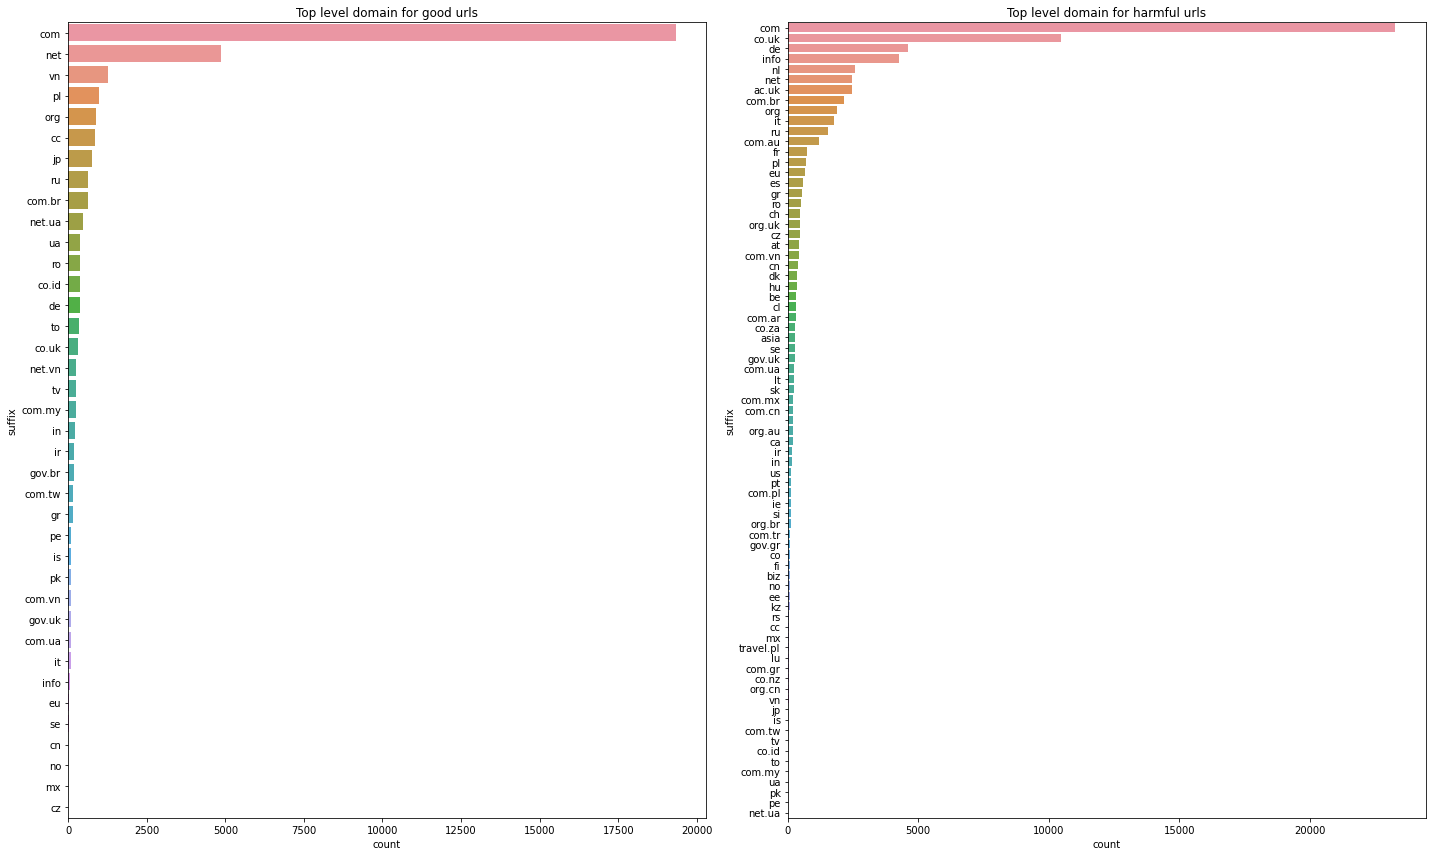

In [0]:
fig = plt.figure(figsize=(20,12))
fig.add_subplot(1,2,1)  
plt.title('Top level domain for good urls')
sns.countplot(y = final_ds_copy[final_ds_copy['label']==0]['suffix'], order = final_ds_copy[final_ds_copy['label']==0]['suffix'].value_counts().index)
fig.add_subplot(1,2,2) 
plt.title('Top level domain for harmful urls')
sns.countplot(y = final_ds_copy[final_ds_copy['label']==1]['suffix'],order = final_ds_copy[final_ds_copy['label']==1]['suffix'].value_counts().index) 
plt.tight_layout()
plt.show()

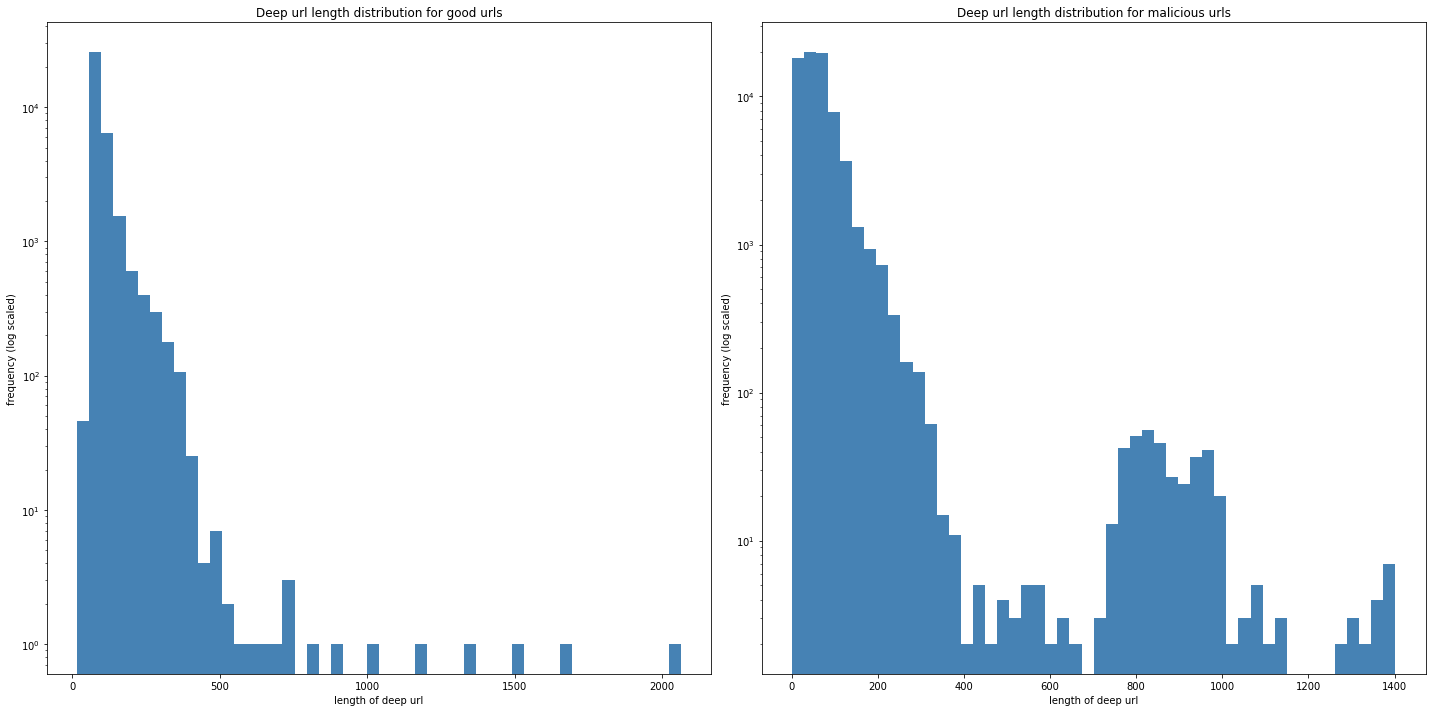

In [0]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)  
plt.title('Deep url length distribution for good urls')
plt.hist(final_ds[final_ds['label']==0]['len deep url'], log = True, color = 'steelblue', bins=50)
plt.ylabel("frequency (log scaled)")
plt.xlabel("length of deep url")
fig.add_subplot(1,2,2) 
plt.title('Deep url length distribution for malicious urls')
plt.hist(final_ds[final_ds['label']==1]['len deep url'], log = True, color = 'steelblue', bins=50)
plt.ylabel("frequency (log scaled)")
plt.xlabel("length of deep url")
plt.tight_layout()
plt.show()


we throw out unnecessary columns (url, deep url) and encode the categorical variable suffix

In [0]:
final_ds = final_ds.drop(['url', 'deep url'], axis = 1)
final_ds = pd.get_dummies(final_ds, prefix = ['suffix'], columns = ['suffix'])
final_ds.head()

,label,len deep url,label_proba_0,label_proba_1,len of domain,suffix_,suffix_ab.ca,suffix_ac,suffix_ac.cr,suffix_ac.id,suffix_ac.in,suffix_ac.jp,suffix_ac.ke,suffix_ac.th,suffix_ac.uk,suffix_ad,suffix_adm.br,suffix_adv.br,suffix_ae,suffix_af,suffix_art.br,suffix_asia,suffix_asn.au,suffix_at,suffix_az,suffix_be,suffix_bg,suffix_biz,suffix_biz.tr,suffix_bn.it,suffix_bs.it,suffix_by,suffix_ca,suffix_cat,suffix_cc,suffix_cf,suffix_ch,suffix_cl,suffix_club,suffix_cn,...,suffix_pl,suffix_pn,suffix_pro,suffix_ps,suffix_pt,suffix_ro,suffix_rs,suffix_ru,suffix_rw,suffix_sa,suffix_se,suffix_sg,suffix_sh.cn,suffix_si,suffix_sk,suffix_so,suffix_space,suffix_su,suffix_sx,suffix_tf,suffix_tj,suffix_tk,suffix_tn,suffix_to,suffix_travel.pl,suffix_tv,suffix_ua,suffix_university,suffix_us,suffix_uz,suffix_vg,suffix_vic.edu.au,suffix_vn,suffix_vn.ua,suffix_vu,suffix_web.id,suffix_ws,suffix_xn--p1ai,suffix_xyz,suffix_zj.cn
0,1,55,6.242518e-11,1.000000e+00,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,113,1.000000e+00,1.926474e-22,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,334,1.000000e+00,1.236210e-16,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,96,9.999999e-01,9.700286e-08,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,140,1.498135e-20,1.000000e+00,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_train = final_ds.loc[indices_train,:]
df_test = final_ds.loc[indices_test,:]

X_train_valid = df_train.drop(['label'], axis=1)
y_train_valid = df_train['label']
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.20, random_state=42, stratify = y_train_valid)
# 20% of train set is taken for validation
X_test = df_test.drop(['label'], axis=1)
y_test = df_test['label']

Standardise all columns except one-hot encoded ones

In [0]:
# train set statistics applied to validation set
ss1 = StandardScaler()
X_train.iloc[:,:4] = ss1.fit_transform(X_train.iloc[:,:4])
X_valid.iloc[:,:4] = ss1.transform(X_valid.iloc[:,:4])

# whole training set statistics (includes validation set) applied to test set
ss2 = StandardScaler()
X_train_valid.iloc[:,:4] = ss2.fit_transform(X_train_valid.iloc[:,:4])
X_test.iloc[:,:4] = ss2.transform(X_test.iloc[:,:4])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# <font color='red'> **Method 2: Random Forest** 

In [0]:
def get_best_model_rf(X_train, y_train, X_valid, y_valid):
  np.random.seed(42)
  n_estimators = np.random.randint(50, high=100, size=(5,))
  max_depths = np.random.randint(50, high=75, size=(5,))
  best_score = 0 
  best_estimator, best_params = None, []
  for n in n_estimators: 
      for max_d in max_depths:
        rf = RandomForestClassifier(n_estimators = n, max_depth = max_d)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_valid)
        score = metrics.accuracy_score(y_valid, y_pred)
        if score>best_score: 
            best_score = score
            best_estimator = rf
            best_params = [n,max_d]
  return best_estimator, best_params, best_score

In [0]:
# best_rf, best_params_rf, best_score_rf = get_best_model_rf(X_train, y_train, X_valid, y_valid)

In [0]:
# # this cell pickles our generated model
# rf_model = {'best_rf':best_rf,'best_params_rf':best_params_rf,'best_score_rf':best_score_rf}
# f = open('rf_model.txt','wb')
# pickle.dump(rf_model,f)
# f.close()

In [0]:
# this cell loads our pickled model
f = open('rf_model.txt','rb')
rf_model = pickle.load(f)
best_rf = rf_model['best_rf']
best_params_rf = rf_model['best_params_rf']
best_score_rf = rf_model['best_score_rf']
f.close()

In [0]:
print(f"Best parameters:\n\tn_estimators: {best_params_rf[0]}\n\tmax_depth: {best_params_rf[1]}")
print(f"\nBest validation accuracy: {best_score_rf*100} %\n")
best_rf.fit(X_train_valid, y_train_valid)

y_train_valid_pred = best_rf.predict(X_train_valid)
y_test_pred = best_rf.predict(X_test)
print(f'Test set accuracy: {metrics.accuracy_score(y_test, y_test_pred)*100} %')
print('Train set report:\n {}'.format(metrics.classification_report(y_train_valid, y_train_valid_pred)))
print('Test set report:\n {}'.format(metrics.classification_report(y_test, y_test_pred)))

Best parameters:
	n_estimators: 78
	max_depth: 60

Best validation accuracy: 99.71906262847746 %

Test set accuracy: 99.29326655537007 %
Train set report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23703
           1       1.00      1.00      1.00     49266

    accuracy                           1.00     72969
   macro avg       1.00      1.00      1.00     72969
weighted avg       1.00      1.00      1.00     72969

Test set report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11675
           1       0.99      1.00      0.99     24265

    accuracy                           0.99     35940
   macro avg       0.99      0.99      0.99     35940
weighted avg       0.99      0.99      0.99     35940



In [0]:
confusion_matrix(y_test, y_test_pred)

array([[11514,   161],
       [   93, 24172]])

**15 most important features** according to our random forest model alongwith their percentages are as follows:

In [0]:
feature_importances = zip(list(X_train), best_rf.feature_importances_*100)
feature_importances_sorted = sorted(feature_importances, key=lambda x: x[1], reverse=True)
for feature in feature_importances_sorted[:15]:
    print(feature)

('label_proba_1', 38.22204303617866)
('label_proba_0', 37.479463340831124)
('len deep url', 11.93243819523408)
('len of domain', 3.8430349893701)
('suffix_co.uk', 1.3278298714824788)
('suffix_com', 1.3138298906282377)
('suffix_net', 1.0667911267259529)
('suffix_vn', 0.541653935742985)
('suffix_info', 0.5059103352679813)
('suffix_jp', 0.49035731635762475)
('suffix_cc', 0.31053744732707816)
('suffix_tv', 0.29229789412264434)
('suffix_ua', 0.261701341904223)
('suffix_ac.uk', 0.24519333524004708)
('suffix_nl', 0.23338296465245364)


# <font color='red'> **Method 3: SVM using RBF kernel** 


In [0]:
def get_best_model_svm(X_train, y_train, X_valid, y_valid):
  np.random.seed(42)
  Cs = [10**i for i in range(-1,4)]
  gammas = [10**i for i in range(-3,2)]
  best_score = 0 
  best_estimator, best_params = None, []
  for C in Cs: 
      for gamma in gammas:
        rbf = svm.SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
        rbf.fit(X_train, y_train)
        y_pred = rbf.predict(X_valid)
        score = metrics.accuracy_score(y_valid, y_pred)
        if score>best_score: 
            best_score = score
            best_estimator = rbf
            best_params = [C, gamma]
  return best_estimator, best_params, best_score

It takes $\approx$ 10 mins per model configuration to run.

Avoid running the below cells and load the best model which is saved

In [0]:
# best_svm, best_params_svm, best_score_svm = get_best_model_svm(X_train, y_train, X_valid, y_valid)
# best_svm.fit(X_train_valid, y_train_valid) # fit the best model on the whole training set

In [0]:
# # this cell pickles our generated model
# svm_model = {'best_svm':best_svm,'best_params_svm':best_params_svm,'best_score_svm':best_score_svm}
# f = open('svm_model.txt','wb')
# pickle.dump(svm_model,f)
# f.close()

In [0]:
# this cell loads our pickled model
f = open('svm_model.txt','rb')
svm_model = pickle.load(f)
best_svm = svm_model['best_svm']
best_params_svm = svm_model['best_params_svm']
best_score_svm = svm_model['best_score_svm']
f.close()

In [0]:
print(f"Best parameters:\n\tC: {best_params_svm[0]}\n\tgamma: {best_params_svm[1]}")
print(f"\nBest validation accuracy: {best_score_svm*100} %\n")

y_train_valid_pred = best_svm.predict(X_train_valid)
y_test_pred = best_svm.predict(X_test)
print(f'Test set accuracy: {metrics.accuracy_score(y_test, y_test_pred)*100} %')
print('Train set report:\n {}'.format(metrics.classification_report(y_train_valid, y_train_valid_pred)))
print('Test set report:\n {}'.format(metrics.classification_report(y_test, y_test_pred)))

Best parameters:
	C: 100
	gamma: 0.01

Best validation accuracy: 99.38330820885295 %

Test set accuracy: 96.46911519198665 %
Train set report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     23703
           1       0.97      0.99      0.98     49266

    accuracy                           0.97     72969
   macro avg       0.97      0.97      0.97     72969
weighted avg       0.97      0.97      0.97     72969

Test set report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     11675
           1       0.97      0.98      0.97     24265

    accuracy                           0.96     35940
   macro avg       0.96      0.96      0.96     35940
weighted avg       0.96      0.96      0.96     35940



In [0]:
confusion_matrix(y_test, y_test_pred)

array([[10877,   798],
       [  471, 23794]])

# <font color='red'> **Method 4: Neural Network**

In [0]:
import torch
from torch.utils.data import TensorDataset,DataLoader

xtrain = torch.tensor(X_train_valid.to_numpy()).float()
ytrain = torch.tensor(y_train_valid.to_numpy())
xtest = torch.tensor(X_test.to_numpy()).float()
ytest = torch.tensor(y_test.to_numpy())

train_loader = DataLoader(TensorDataset(xtrain, ytrain), batch_size= 1000)

In [0]:
from torch import nn, optim
import torch.nn.functional as F

hidden_1 = 250
hidden_2 = 200
hidden_3 = 150
layers = [
          nn.Linear(xtrain.shape[1], hidden_1), nn.ReLU(), nn.BatchNorm1d(hidden_1),
          nn.Linear(hidden_1, hidden_2), nn.ReLU(), nn.BatchNorm1d(hidden_2),
          nn.Linear(hidden_2, hidden_3), nn.ReLU(), nn.BatchNorm1d(hidden_3),
          nn.Linear(hidden_3, hidden_3), nn.ReLU(), nn.BatchNorm1d(hidden_3),
          nn.Linear(hidden_3, 2)
]
model = nn.Sequential(*layers)
learning_rate = 1e-3
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9 ,nesterov=True)

In [0]:
def get_num_correct(ypred, ytrue):
    preds = ypred.argmax(axis=1)
    return (preds == ytrue).sum()

n_epochs = 50

for epoch in range(n_epochs):
    num_correct, num_samples = 0, 0
    for xbatch, ybatch in train_loader:
        optimizer.zero_grad()
        y_pred = model(xbatch)
        loss = F.cross_entropy(y_pred,ybatch)
        loss.backward()
        optimizer.step()
        num_correct += get_num_correct(y_pred,ybatch)
        num_samples += xbatch.size(0)

    if epoch%5 == 0:
        acc = float(num_correct) / num_samples
        print(f"Epoch: {epoch}")
        print("\tTraining accuracy: {:.4f} %".format(acc*100))
        with torch.no_grad():
            preds = model(xtest)
            acc = float(get_num_correct(preds,ytest))/preds.size(0)
            print("\tTest accuracy: {:.4f} %".format(acc*100))


Epoch: 0
	Training accuracy: 90.6303 %
	Test accuracy: 98.0774 %
Epoch: 5
	Training accuracy: 98.7200 %
	Test accuracy: 98.1803 %
Epoch: 10
	Training accuracy: 98.9681 %
	Test accuracy: 98.5364 %
Epoch: 15
	Training accuracy: 99.2161 %
	Test accuracy: 98.2387 %
Epoch: 20
	Training accuracy: 99.2709 %
	Test accuracy: 98.4474 %
Epoch: 25
	Training accuracy: 99.3134 %
	Test accuracy: 98.5170 %
Epoch: 30
	Training accuracy: 99.3244 %
	Test accuracy: 98.5337 %
Epoch: 35
	Training accuracy: 99.3408 %
	Test accuracy: 98.4975 %
Epoch: 40
	Training accuracy: 99.3655 %
	Test accuracy: 98.5364 %
Epoch: 45
	Training accuracy: 99.3778 %
	Test accuracy: 98.5615 %


In [0]:
with torch.no_grad():
    y_train_pred = model(xtrain).squeeze().numpy().argmax(axis=1)
    y_test_pred = model(xtest).squeeze().numpy().argmax(axis=1)
print('Train set report:\n {}'.format(metrics.classification_report(ytrain, y_train_pred)))
print('Test set report:\n {}'.format(metrics.classification_report(ytest, y_test_pred)))

Train set report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     23703
           1       0.99      1.00      0.99     49266

    accuracy                           0.99     72969
   macro avg       0.99      0.99      0.99     72969
weighted avg       0.99      0.99      0.99     72969

Test set report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     11675
           1       0.99      0.99      0.99     24265

    accuracy                           0.99     35940
   macro avg       0.98      0.98      0.98     35940
weighted avg       0.99      0.99      0.99     35940



## <font color='red'>  **Random Forest without Naive bayes classifier as attributes**

Here we take the best classifier from the above ones and don't consider the probabilites predicted by Naive bayes classifier as attributes. 

In [0]:
X_train_valid.drop(['label_proba_0','label_proba_1'], axis=1, inplace=True)
X_test.drop(['label_proba_0','label_proba_1'], axis=1, inplace=True)

In [0]:
X_test.head()

,len deep url,len of domain,suffix_,suffix_ab.ca,suffix_ac,suffix_ac.cr,suffix_ac.id,suffix_ac.in,suffix_ac.jp,suffix_ac.ke,suffix_ac.th,suffix_ac.uk,suffix_ad,suffix_adm.br,suffix_adv.br,suffix_ae,suffix_af,suffix_art.br,suffix_asia,suffix_asn.au,suffix_at,suffix_az,suffix_be,suffix_bg,suffix_biz,suffix_biz.tr,suffix_bn.it,suffix_bs.it,suffix_by,suffix_ca,suffix_cat,suffix_cc,suffix_cf,suffix_ch,suffix_cl,suffix_club,suffix_cn,suffix_co,suffix_co.id,suffix_co.il,...,suffix_pl,suffix_pn,suffix_pro,suffix_ps,suffix_pt,suffix_ro,suffix_rs,suffix_ru,suffix_rw,suffix_sa,suffix_se,suffix_sg,suffix_sh.cn,suffix_si,suffix_sk,suffix_so,suffix_space,suffix_su,suffix_sx,suffix_tf,suffix_tj,suffix_tk,suffix_tn,suffix_to,suffix_travel.pl,suffix_tv,suffix_ua,suffix_university,suffix_us,suffix_uz,suffix_vg,suffix_vic.edu.au,suffix_vn,suffix_vn.ua,suffix_vu,suffix_web.id,suffix_ws,suffix_xn--p1ai,suffix_xyz,suffix_zj.cn
47130,0.898187,-0.962250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17786,-0.538912,-2.501851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29868,-1.030551,-3.271652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101020,0.746913,-3.271652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7578,223.000000,13.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
best_rf, best_params_rf, best_score_rf = get_best_model_rf(X_train, y_train, X_valid, y_valid)

In [0]:
print(f"Best parameters:\n\tn_estimators: {best_params_rf[0]}\n\tmax_depth: {best_params_rf[1]}")
print(f"\nBest validation accuracy: {best_score_rf*100} %\n")
best_rf.fit(X_train_valid, y_train_valid)

y_train_valid_pred = best_rf.predict(X_train_valid)
y_test_pred = best_rf.predict(X_test)
print(f'Test set accuracy: {metrics.accuracy_score(y_test, y_test_pred)*100} %')
print('Train set report:\n {}'.format(metrics.classification_report(y_train_valid, y_train_valid_pred)))
print('Test set report:\n {}'.format(metrics.classification_report(y_test, y_test_pred)))

Best parameters:
	n_estimators: 78
	max_depth: 50

Best validation accuracy: 99.71221049746471 %

Test set accuracy: 94.39343350027825 %
Train set report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     23703
           1       0.98      0.95      0.97     49266

    accuracy                           0.95     72969
   macro avg       0.94      0.96      0.95     72969
weighted avg       0.96      0.95      0.95     72969

Test set report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     11675
           1       0.97      0.94      0.96     24265

    accuracy                           0.94     35940
   macro avg       0.93      0.94      0.94     35940
weighted avg       0.95      0.94      0.94     35940

